# Ch8 Matrix Calculus

## 8.1 Calculus

### 8.1.3 Gradient, Hessian and Derivatives

In [ ]:
# Import library
from sympy import symbols, Matrix, diff, hessian, lambdify, init_printing
init_printing(use_latex='mathjax')

In [19]:
# Gradient & Hessian via SymPy
x1, x2 = symbols('x1 x2')
f_cubic_sym = x1**3 + x2**3 + x1*x2

# Analytic gradient / Hessian
grad_cubic_sym = Matrix([diff(f_cubic_sym, x1), diff(f_cubic_sym, x2)])
H_cubic_sym = hessian(f_cubic_sym, (x1, x2))

print("∇f(x):", grad_cubic_sym)
print("H(x):")
display(H_cubic_sym)

∇f(x): Matrix([[3*x1**2 + x2], [x1 + 3*x2**2]])
H(x):


⎡6⋅x₁   1  ⎤
⎢          ⎥
⎣ 1    6⋅x₂⎦

In [21]:
# Numeric spot-check at x=(1.0, 0.5)
grad_cubic = lambdify((x1, x2), grad_cubic_sym, 'numpy')
H_cubic = lambdify((x1, x2), H_cubic_sym, 'numpy')
print("Gradient at (1,0.5):\n", grad_cubic(1.0, 0.5))
print("Hessian  at (1,0.5):\n", H_cubic(1.0, 0.5))

Gradient at (1,0.5):
 [[3.5 ]
 [1.75]]
Hessian  at (1,0.5):
 [[6. 1.]
 [1. 3.]]


### 8.1.4 Matrix Derivatives

In [22]:
# Import library
from sympy import symbols, Matrix, trace, det, log

In [23]:
# Example 1: d/dx (x^T A x) = (A + A^T) x
a11,a12,a21,a22 = symbols('a11 a12 a21 a22')
A = Matrix([[a11,a12],[a21,a22]])
x = Matrix(symbols('x1 x2'))
f1 = (x.T * A * x)[0]
grad_x = Matrix([f1.diff(v) for v in x])
print("d/dx (x^T A x) =", grad_x)  # equals (A + A.T)*x

d/dx (x^T A x) = Matrix([[2*a11*x1 + a12*x2 + a21*x2], [a12*x1 + a21*x1 + 2*a22*x2]])


In [24]:
# Example 2: d/dX tr(AX) = A^T
X11,X12,X21,X22 = symbols('X11 X12 X21 X22')
X = Matrix([[X11,X12],[X21,X22]])
f2 = trace(A*X)
grad_X = Matrix([[f2.diff(X[i,j]) for j in range(2)] for i in range(2)])
print("d/dX tr(AX) =")
display(grad_X)  # equals A.T

d/dX tr(AX) =


⎡a₁₁  a₂₁⎤
⎢        ⎥
⎣a₁₂  a₂₂⎦

In [25]:
# Example 3: f(X) = log det(X) → ∇f(X) = (X^{-1})^T
b11,b12,b21,b22 = symbols('b11 b12 b21 b22')
B = Matrix([[b11,b12],[b21,b22]])
f3 = log(det(B))
grad_B = Matrix([[f3.diff(B[i,j]) for j in range(2)] for i in range(2)])
print("∇_X log det(X) =")
display(grad_B)
print("Compare with (B.inv())^T:")
display(B.inv().T)

∇_X log det(X) =


⎡       b₂₂               -b₂₁       ⎤
⎢─────────────────  ─────────────────⎥
⎢b₁₁⋅b₂₂ - b₁₂⋅b₂₁  b₁₁⋅b₂₂ - b₁₂⋅b₂₁⎥
⎢                                    ⎥
⎢      -b₁₂                b₁₁       ⎥
⎢─────────────────  ─────────────────⎥
⎣b₁₁⋅b₂₂ - b₁₂⋅b₂₁  b₁₁⋅b₂₂ - b₁₂⋅b₂₁⎦

Compare with (B.inv())^T:


⎡       b₂₂               -b₂₁       ⎤
⎢─────────────────  ─────────────────⎥
⎢b₁₁⋅b₂₂ - b₁₂⋅b₂₁  b₁₁⋅b₂₂ - b₁₂⋅b₂₁⎥
⎢                                    ⎥
⎢      -b₁₂                b₁₁       ⎥
⎢─────────────────  ─────────────────⎥
⎣b₁₁⋅b₂₂ - b₁₂⋅b₂₁  b₁₁⋅b₂₂ - b₁₂⋅b₂₁⎦

### 8.1.5 Chain Rule

In [26]:
# Import library
from sympy import symbols, Matrix

In [28]:
# Define symbols
x1, x2 = symbols('x1 x2')

# Affine map g(x)=Ax+b
A = Matrix([[2,1],[1,3]])
b = Matrix([1,-1])
x = Matrix([x1,x2])

# Objective f(x)
g = A*x + b
f = (g.T*g)[0]

# Graident via chain rule
df_dx = Matrix([f.diff(v) for v in x])

print("df/dx (via chain rule):")
display(df_dx)

df/dx (via chain rule):


⎡10⋅x₁ + 10⋅x₂ + 2⎤
⎢                 ⎥
⎣10⋅x₁ + 20⋅x₂ - 4⎦

In [14]:
# Example: f(g(x)) with g(x) = Ax + b, f(y) = ||y||²
A = np.array([[2, 1], [1, 3]])
b = np.array([1, -1])
x = np.array([0.5, 1.0])

g_x = A @ x + b
f_g = np.sum(g_x**2)

print("g(x) =", g_x)
print("f(g(x)) = ||g(x)||² =", f_g)

g(x) = [3.  2.5]
f(g(x)) = ||g(x)||² = 15.25


In [29]:
# Numeric check at (0.5, 1.0)
df_dx_num = lambdify((x1,x2), df_dx, 'numpy')
print("df/dx at (0.5,1.0):", df_dx_num(0.5,1.0).ravel())

df/dx at (0.5,1.0): [17. 21.]


### 8.1.6 Taylor Approximation

In [ ]:
# Import library
from sympy import symbols, Matrix, hessian, lambdify

In [31]:
# Define symbols
x1, x2 = symbols('x1 x2')
f_taylor_sym = x1**2 + x1*x2 + 2*x2**2

# Base point x0 and perturbation h
x0_vals = {x1: 1.0, x2: 0.5}
h1, h2 = symbols('h1 h2')

# Gradient/Hessian at x0
grad_t = Matrix([f_taylor_sym.diff(x1), f_taylor_sym.diff(x2)])
H_t = hessian(f_taylor_sym, (x1,x2))
grad_at_x0 = grad_t.subs(x0_vals)
H_at_x0 = H_t.subs(x0_vals)

# Taylor forms in h = (h1,h2)
f0 = f_taylor_sym.subs(x0_vals)
lin = f0 + Matrix([h1,h2]).dot(grad_at_x0)
quad = f0 + Matrix([h1,h2]).dot(grad_at_x0) + (Matrix([h1,h2]).T*H_at_x0*Matrix([h1,h2]))[0]/2

print("f0:", f0)
print("1st-order Taylor:", lin.expand())
print("2nd-order Taylor:", quad.expand())

f0: 2.00000000000000
1st-order Taylor: 2.5*h1 + 3.0*h2 + 2.0
2nd-order Taylor: h1**2 + h1*h2 + 2.5*h1 + 2*h2**2 + 3.0*h2 + 2.0


## 8.2 Convexity

### 8.2.2 Convex Functions

In [ ]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

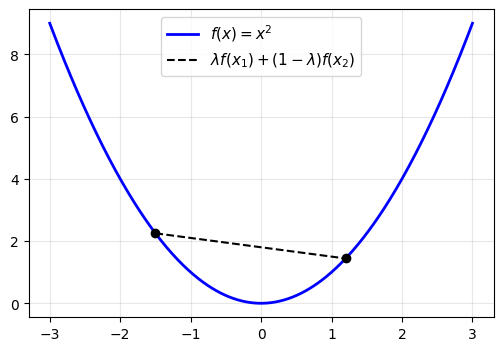

In [9]:
# Example: f(x)=x^2 
f = lambda x: x**2
x = np.linspace(-3, 3, 400)
y = f(x)

fig, ax = plt.subplots(figsize=(6,4))

# Plot
ax.plot(x, y, 'b-', linewidth=2, label=r"$f(x)=x^2$")

# Check convexity inequlity 
x1, x2 = -1.5, 1.2
y1, y2 = f(x1), f(x2)
ax.plot([x1, x2], [y1, y2], "k--", lw=1.5, 
        label=r"$\lambda f(x_1) + (1-\lambda) f(x_2)$")

ax.plot([x1, x2], [y1, y2], "ko")
ax.legend(fontsize=11, loc="upper center")
ax.grid(alpha=0.3)
plt.show()

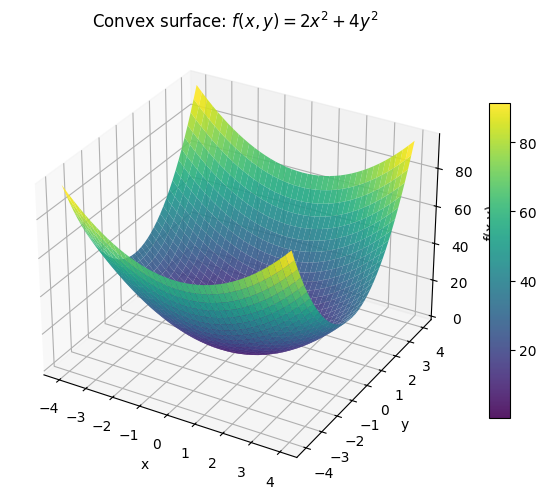

In [38]:
# Convex function surface & contours

# f(x,y) = 2x^2 + 4y^2
def f_convex2d(x, y):
    return 2*x**2 + 4*y**2

# Grid
x = np.linspace(-4, 4, 41)
y = np.linspace(-4, 4, 41)
X, Y = np.meshgrid(x, y)
Z = f_convex2d(X, Y)

# 3D surface
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
ax.set_title(r"Convex surface: $f(x,y)=2x^2+4y^2$")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("f(x,y)")
fig.colorbar(surf, shrink=0.7, aspect=15)
plt.tight_layout(); plt.show()

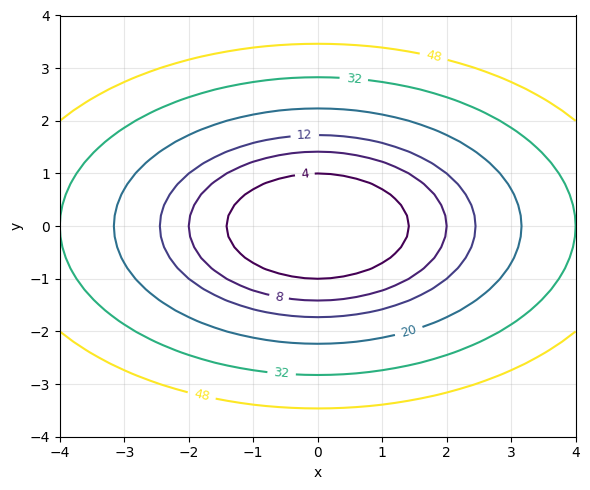

In [39]:
# Contour
plt.figure(figsize=(6, 5))
cs = plt.contour(X, Y, Z, levels=[4, 8, 12, 20, 32, 48])
plt.clabel(cs, inline=True, fontsize=9)
plt.xlabel("x"); plt.ylabel("y")
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()